Pregnancies : 임신 횟수 <br>
Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도<br>
BloodPressure : 이완기 혈압 (mm Hg)<br>
SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값<br>
Insulin : 2시간 혈청 인슐린 (mu U / ml)<br>
BMI : 체질량 지수 (체중kg / 키(m)^2)<br>
DiabetesPedigreeFunction : 당뇨병 혈통 기능<br>
Age : 나이<br>
Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/User/Desktop/data course/project python/data/diabetes.csv", encoding="cp949")

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 학습, 예측 데이터셋 나누기

In [11]:
# 정수만 표현하게 하기 위해 int하고 0.8은 전체 행 df.shape[0]-(행,열)에서 행의 숫자- 의 0.8만큼을 의미
split_count = int(df.shape[0]*0.8)
split_count

614

In [16]:
train = df[:split_count].copy() #613번까지 가지고 온다. 80% train set
train.shape

(614, 9)

In [18]:
test = df[split_count:].copy() # 20% test set
test.shape

(154, 9)

## 학습, 예측에 사용할 컬럼

In [21]:
feature_names = train.columns[:-1].tolist() # 마지막 outcome은 예측해야 할 것 , 여러 개의 값을 가져오므로 list값으로 만들어 줌.
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 정답값이자 예측해야 될 값

In [22]:
label_name = train.columns[-1]
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [38]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [39]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [40]:
# 예측에 사용할 데이터셋

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [41]:
# 실제로는 예측의 정답값을 알 수 없지만, 여기서는 데이터셋이 있어서 알 수 있기 때문에
# 실제로 예측 들어가기 전에 한 번 테스트 해본다.

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [42]:
from sklearn.tree import DecisionTreeClassifier # 당뇨병인지 아닌지 예측 ; 분류 ; classifier

model = DecisionTreeClassifier() #random_state : 예측 결과? 고정
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 학습(훈련)

In [43]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 예측

In [46]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

## 트리 알고리즘 분석하기

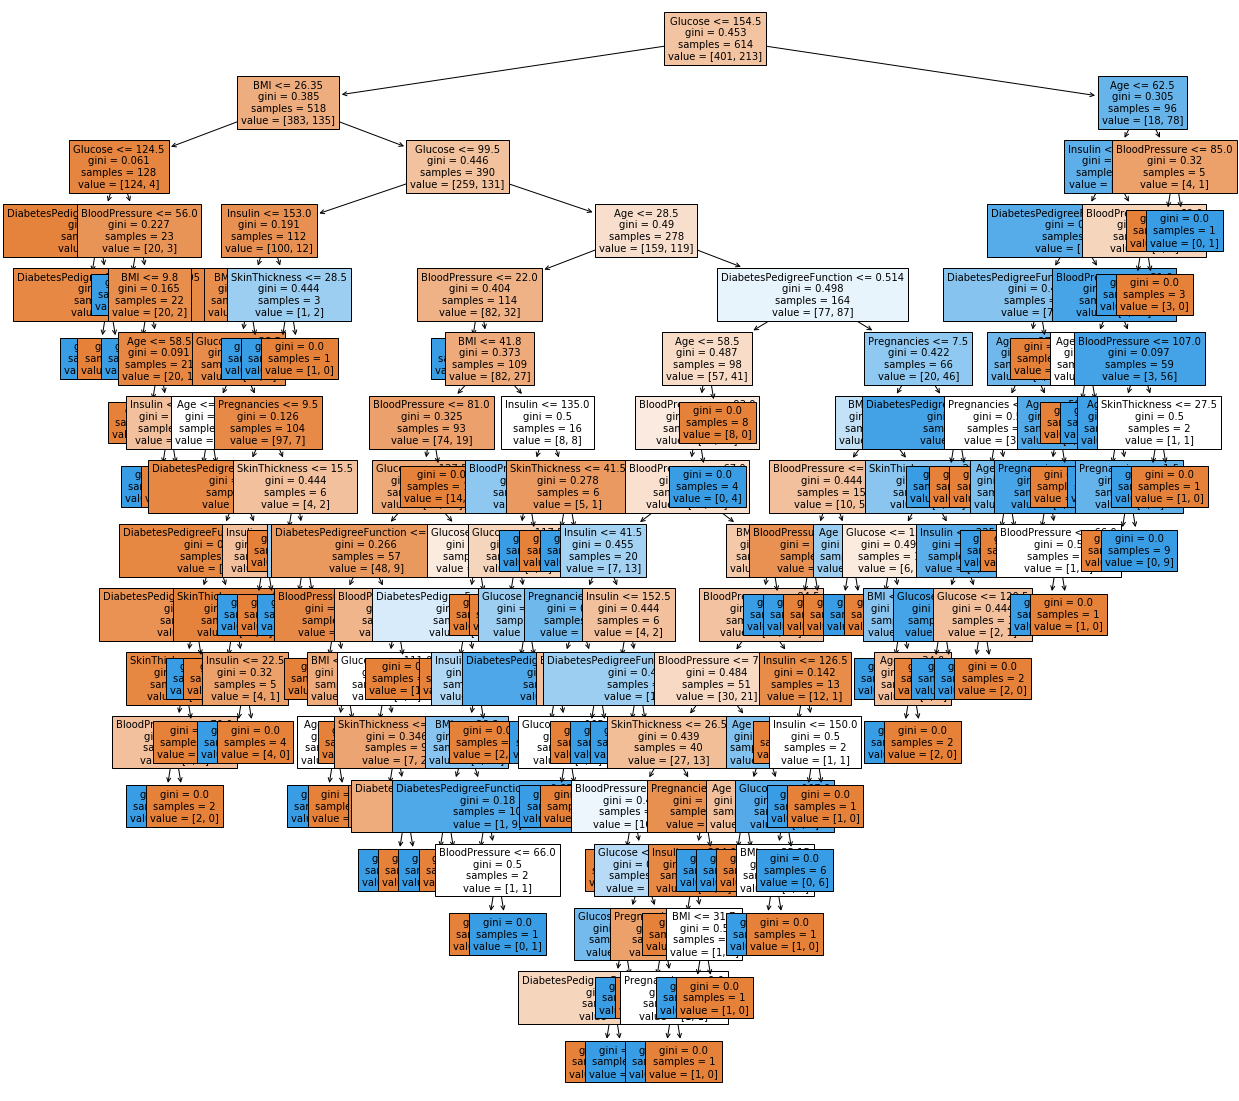

In [52]:
from sklearn.tree import plot_tree

# tree 변수 지정해주면 그림으로 나온다.

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

# 가장 좋은 조건이 위에 있음 = Glucose -> feature importance에서 확인할 수 있음.

In [53]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.05418849, 0.32706162, 0.14434555, 0.04951782, 0.07150435,
       0.13590435, 0.1002235 , 0.11725432])

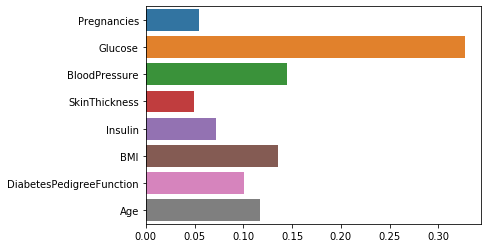

In [54]:
# 피처의 중요도 시각화 하기
# Insulin이 중요할 것 같은데, 막상 크게 중요하게 나오지 않았음.

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도(Accuracy) 측정하기

In [63]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 된다.
# 여기에서 절댓값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.

# y_test == y_predict 로 봐도 되고

# 몇퍼센트를 잘못 예측했는가?
#   : abs(y_test - y_predict).sum() / len(y_test)
diff_count = abs(y_test - y_predict).sum()
diff_count

39

In [67]:
# 예측의 정확도를 구한다.

( (len(y_test) - diff_count) / len(y_test) ) * 100

74.67532467532467

In [69]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test, y_predict) * 100

74.67532467532467

In [74]:
# 정답값을 알고 있을 때만 구할 수 있다.

model.score(x_test, y_test) * 100

74.67532467532467